## Import Necessary Modules

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report,roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, validation_curve

## Data Reading

In [127]:
fraud_df = pd.read_csv(' https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/Fraud_Detection_Dataset.csv')
fraud_df.head(10)

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No
5,6,2095,395.323790,2023-01-01 00:05:00,Dining,New York,421.926105,548.706785,mobile,No
6,7,4772,967.649233,2023-01-01 00:06:00,Groceries,Los Angeles,1226.767073,331.319088,desktop,No
7,8,4092,16.558875,2023-01-01 00:07:00,Dining,Chicago,78.163605,662.724041,desktop,No
8,9,2638,533.075713,2023-01-01 00:08:00,Dining,Los Angeles,553.556682,896.814583,mobile,No
9,10,3169,909.749227,2023-01-01 00:09:00,Electronics,Chicago,571.664421,505.032036,mobile,No


## Data Analysis

In [128]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  int64  
 1   Customer ID                  10000 non-null  int64  
 2   Transaction Amount           10000 non-null  float64
 3   Transaction Date and Time    10000 non-null  object 
 4   Merchant Category            10000 non-null  object 
 5   Location                     10000 non-null  object 
 6   Previous Transaction Amount  10000 non-null  float64
 7   Time Since Last Transaction  10000 non-null  float64
 8   Device Type                  10000 non-null  object 
 9   Fraud                        10000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 781.4+ KB


In [129]:
fraud_df.describe()

,Transaction ID,Customer ID,Transaction Amount,Previous Transaction Amount,Time Since Last Transaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,3010.561100,559.865608,461.410984,677.040726
std,2886.89568,1152.371939,399.984400,334.582413,432.386769
min,1.00000,1000.000000,1.000000,0.000000,1.000000
25%,2500.75000,2001.750000,262.969956,181.109688,295.523894
50%,5000.50000,3004.000000,522.370941,404.367010,653.143168
75%,7500.25000,4010.000000,788.415931,676.079655,1048.479972
max,10000.00000,4999.000000,2953.394492,1500.000000,1694.715674


In [130]:
fraud_df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant Category', 'Location',
       'Previous Transaction Amount', 'Time Since Last Transaction',
       'Device Type', 'Fraud'],
      dtype='object')

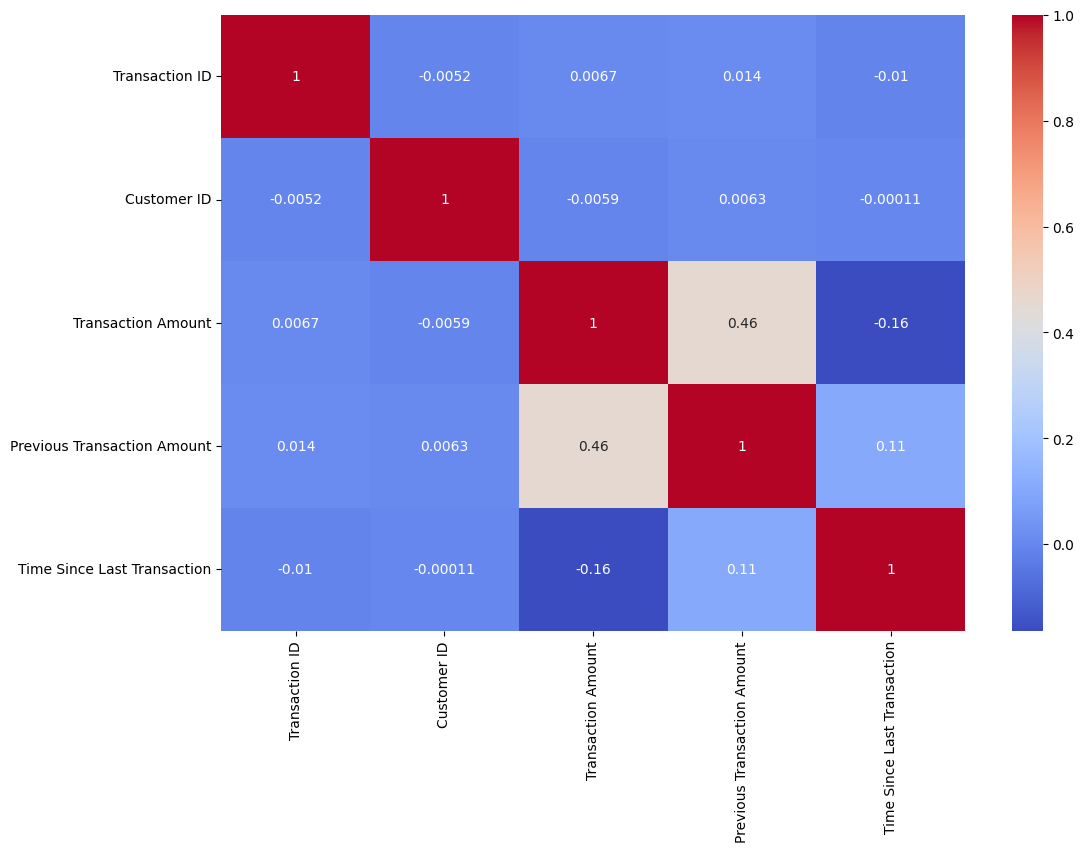

In [131]:
# Correlation of different columns
# As displayed by the correlation matrix you can see that 'Transaction Amount' and 'Previous Transaction Amount' have a high correlation
# This is because the 'Previous Transaction Amount' column derives its values from the 'Transaction Amount' column

corr = fraud_df[['Transaction ID', 'Customer ID', 'Transaction Amount', 'Previous Transaction Amount', 'Time Since Last Transaction']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [132]:
fraud_df['Fraud'].value_counts()

Fraud
No     8608
Yes    1392
Name: count, dtype: int64

In [133]:
fraud_df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant Category', 'Location',
       'Previous Transaction Amount', 'Time Since Last Transaction',
       'Device Type', 'Fraud'],
      dtype='object')

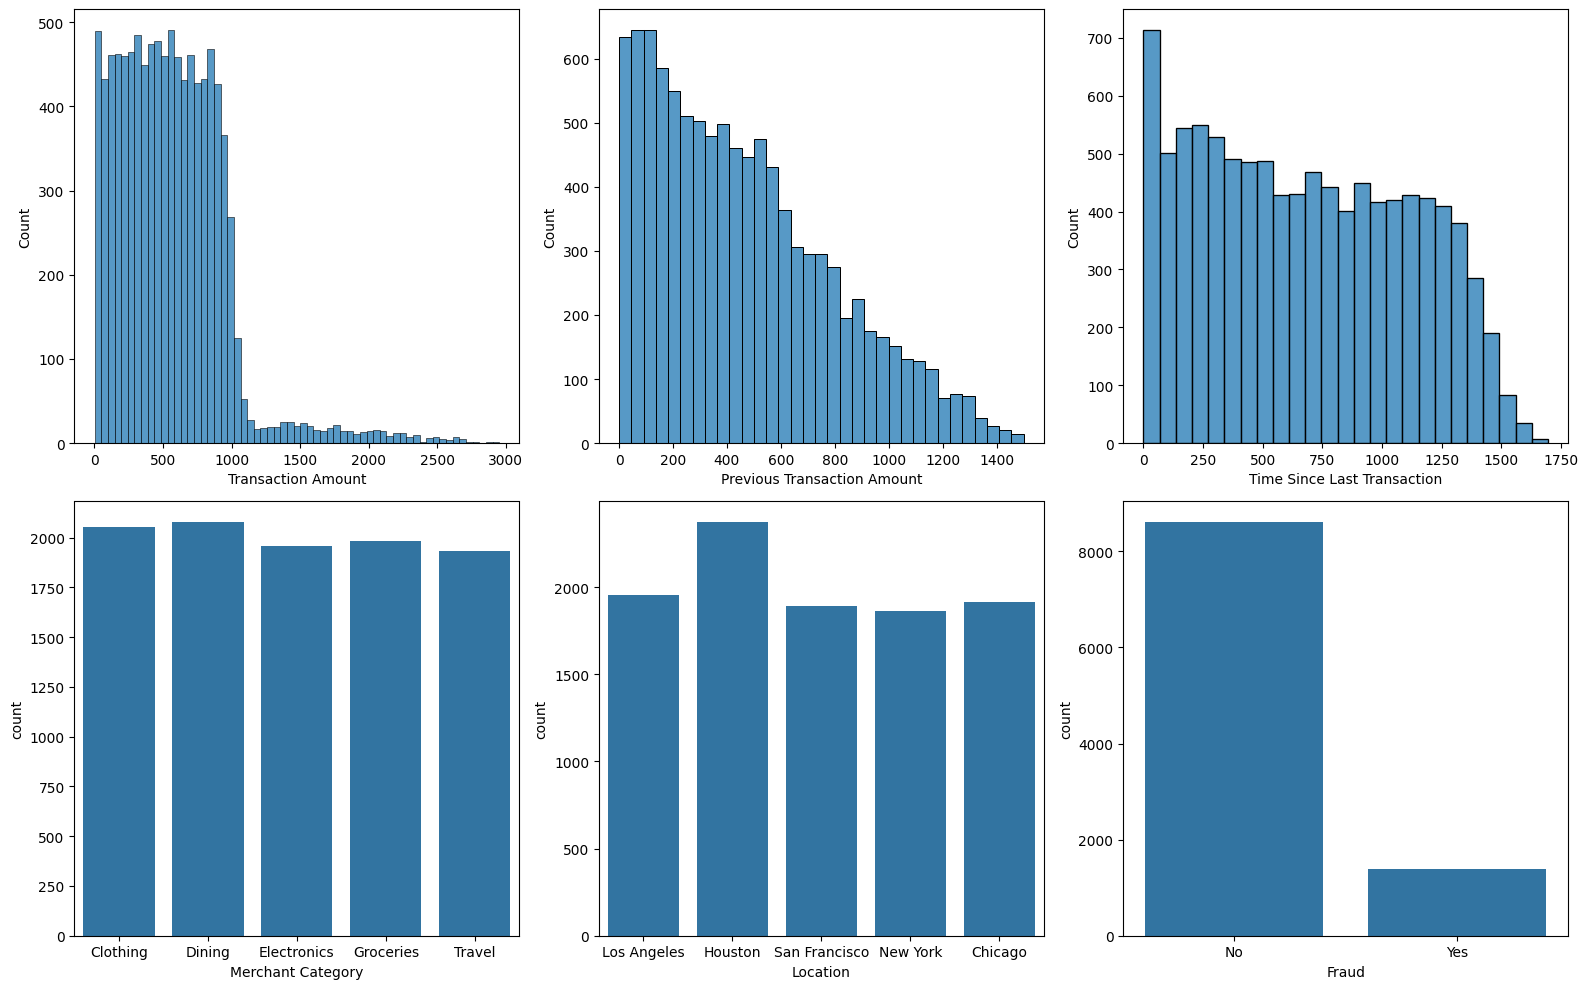

In [134]:
# Plotting values for different variables to understand varaiability

plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
sns.histplot(fraud_df['Transaction Amount'])

plt.subplot(2, 3, 2)
sns.histplot(fraud_df['Previous Transaction Amount'])

plt.subplot(2, 3, 3)
sns.histplot(fraud_df['Time Since Last Transaction'])

plt.subplot(2, 3, 4)
sns.countplot(x='Merchant Category', data = fraud_df)

plt.subplot(2, 3, 5)
sns.countplot(x='Location', data = fraud_df)

plt.subplot(2, 3, 6)
sns.countplot(x='Fraud', data = fraud_df)

plt.tight_layout()
plt.show()

In [135]:
# Here is it observed that 'Merchant Category' and 'Location' have a decent spread in different classes 
# 'Transaction amount' has major variability and indicates majority of the transactions have been taken place for amount < $1000
# 'Previous Transaction amount' has a declining price graph and as its dependent on transaction amount it indicates that 
# there is a similar trend and majority of the values are for amount < $600
# Here based on 'Fraud' category, the data is imbalanced and shows a roughly 20:80 split for (Yes, No) categories

<Axes: xlabel='Device Type', ylabel='Count'>

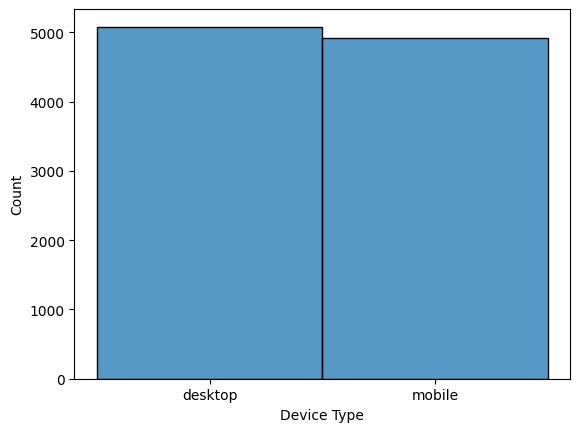

In [136]:
# Analyzing for 'Device Type'
# Here there is about an even split in the category indicating customers are using both their mobile's and desktop's fpr transactions

sns.histplot(fraud_df['Device Type'])

## Feature Engineering

In [137]:
# Here 'Time Since Last Transaction' is in minutes and 'Transaction Date and Time' is in days
# The units for these two columns are different and it would be better to interpret them on a similar scale
# 1 day = 24(Hours)*60(Minutes) = 1440
# The 'Time Since Last Transaction' column only ranges from 1-1700 
# This means that most of the transactions have taken place within a 1 or max 2 days
# Hence this above operation wouldn't make sense

# Solution: We can transform it to Hourly values for better readability and classify them into those categories
# 1 Hour = 60 Minutes, Hence 1700 Minutes contain roughly 28 hours 

# Transforming 'Time Since Last Transaction' from minutes to hours for better analysis and readability

fraud_df['Last Transaction Hour'] = fraud_df['Time Since Last Transaction'].apply(lambda x: x/60)

In [138]:
fraud_df['Last Transaction Hour'].describe()

count    10000.000000
mean        11.284012
std          7.206446
min          0.016667
25%          4.925398
50%         10.885719
75%         17.474666
max         28.245261
Name: Last Transaction Hour, dtype: float64

In [139]:
fraud_df[['Time Since Last Transaction', 'Last Transaction Hour']]

,Time Since Last Transaction,Last Transaction Hour
0,481.377516,8.022959
1,1159.211075,19.320185
2,720.677284,12.011288
3,1.000000,0.016667
4,1378.958721,22.982645
...,...,...
9995,414.231539,6.903859
9996,1090.687430,18.178124
9997,186.667431,3.111124
9998,116.343224,1.939054


In [140]:
# Hence the categories will be 0-2, 3-5, 6-8 and so on till 27-29 as max value is 28 for 'Last Transaction Hour'
# Categorizing 'Last Transaction Hour' column

bins = list(range(0, 33, 3))  
labels = [f"{i}-{i+2}" for i in bins[:-1]]

fraud_df['Last Transaction Hour Bucket'] = pd.cut(fraud_df['Last Transaction Hour'], bins=bins, labels=labels, right=False)
fraud_df['Last Transaction Hour Bucket']

0         6-8
1       18-20
2       12-14
3         0-2
4       21-23
        ...  
9995      6-8
9996    18-20
9997      3-5
9998      0-2
9999      3-5
Name: Last Transaction Hour Bucket, Length: 10000, dtype: category
Categories (10, object): ['0-2' < '3-5' < '6-8' < '9-11' ... '18-20' < '21-23' < '24-26' < '27-29']

In [141]:
# Here all the range values are displayed to confirm the operation and check for NaN values
fraud_df['Last Transaction Hour Bucket'].unique()

['6-8', '18-20', '12-14', '0-2', '21-23', '9-11', '3-5', '15-17', '24-26', '27-29']
Categories (10, object): ['0-2' < '3-5' < '6-8' < '9-11' ... '18-20' < '21-23' < '24-26' < '27-29']

In [142]:
fraud_df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant Category', 'Location',
       'Previous Transaction Amount', 'Time Since Last Transaction',
       'Device Type', 'Fraud', 'Last Transaction Hour',
       'Last Transaction Hour Bucket'],
      dtype='object')

In [143]:
# Here even 'Transaction Amount' and 'Previous Transaction Amount' have a wide range of values
fraud_df[['Transaction Amount', 'Previous Transaction Amount']].describe()

,Transaction Amount,Previous Transaction Amount
count,10000.000000,10000.000000
mean,559.865608,461.410984
std,399.984400,334.582413
min,1.000000,0.000000
25%,262.969956,181.109688
50%,522.370941,404.367010
75%,788.415931,676.079655
max,2953.394492,1500.000000


In [144]:
# Here 'Transaction Amount' ranges from 1-3000 and 'Previous Transaction Amount' ranges from 0-1500
# We can break down 'Transaction Amount' into separate sections by dividing by 100
# Similarly, we can break down 'Previous Transaction Amount' into separate sections by dividing by 50
# This will give us even 30 sections for both columns
# We can classify these amount columns into different categories for better analysis and readability

# Categorizing 'Transaction Amount' column
bins = list(range(1, 3100, 100))  
labels = [f"{i}-{i+99}" for i in bins[:-1]]

fraud_df['Transaction Amount Bucket'] = pd.cut(fraud_df['Transaction Amount'], bins=bins, labels=labels, right=False)
fraud_df['Transaction Amount Bucket']

0         601-700
1         401-500
2         401-500
3         701-800
4         201-300
          ...    
9995    1401-1500
9996      701-800
9997      801-900
9998        1-100
9999      101-200
Name: Transaction Amount Bucket, Length: 10000, dtype: category
Categories (30, object): ['1-100' < '101-200' < '201-300' < '301-400' ... '2601-2700' < '2701-2800' < '2801-2900' < '2901-3000']

In [145]:
# Categorizing 'Previous Transaction Amount' column
bins = list(range(0, 1550, 50))  
labels = [f"{i}-{i+49}" for i in bins[:-1]]

fraud_df['Previous Transaction Amount Bucket'] = pd.cut(fraud_df['Previous Transaction Amount'], bins=bins, labels=labels, right=False)
fraud_df['Previous Transaction Amount Bucket']

0         550-599
1         400-449
2         250-299
3       1050-1099
4         200-249
          ...    
9995        50-99
9996      900-949
9997      500-549
9998         0-49
9999      150-199
Name: Previous Transaction Amount Bucket, Length: 10000, dtype: category
Categories (30, object): ['0-49' < '50-99' < '100-149' < '150-199' ... '1300-1349' < '1350-1399' < '1400-1449' < '1450-1499']

In [146]:
fraud_df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant Category', 'Location',
       'Previous Transaction Amount', 'Time Since Last Transaction',
       'Device Type', 'Fraud', 'Last Transaction Hour',
       'Last Transaction Hour Bucket', 'Transaction Amount Bucket',
       'Previous Transaction Amount Bucket'],
      dtype='object')

In [147]:
fraud_df['Transaction Date and Time'].unique()

array(['2023-01-01 00:00:00', '2023-01-01 00:01:00',
       '2023-01-01 00:02:00', ..., '2023-01-07 22:37:00',
       '2023-01-07 22:38:00', '2023-01-07 22:39:00'], dtype=object)

In [148]:
fraud_df['Transaction Date and Time'].dtype

dtype('O')

In [149]:
# Converting 'Transaction Date and Time' into string type
#fraud_df['Transaction Date and Time'] = fraud_df['Transaction Date and Time'].astype(str)
#fraud_df[['Transaction Date', 'Transaction Time']] = fraud_df['Transaction Date and Time'].str.split(' ')

# Extracting Day from  'Transaction Date and Time' into day and time
fraud_df['Transaction Date and Time'] = pd.to_datetime(fraud_df['Transaction Date and Time'])
fraud_df['Transaction Date'] = fraud_df['Transaction Date and Time'].dt.date

In [150]:
fraud_df['Transaction Date'].unique()

array([datetime.date(2023, 1, 1), datetime.date(2023, 1, 2),
       datetime.date(2023, 1, 3), datetime.date(2023, 1, 4),
       datetime.date(2023, 1, 5), datetime.date(2023, 1, 6),
       datetime.date(2023, 1, 7)], dtype=object)

In [151]:
# 'Fraud' Column is a string variable and is divided into 2 cataegories (Yes,No)
fraud_df['Fraud'].unique()

array(['No', 'Yes'], dtype=object)

In [152]:
# Transforming this column to numerical values: No:0, Yes:1 for dependent/output variable
fraud_df['Fraud Value'] = fraud_df['Fraud'].apply(lambda x: 0 if x == 'No' else 1)
fraud_df['Fraud Value']

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: Fraud Value, Length: 10000, dtype: int64

In [153]:
# Verifying correct transformation
print(fraud_df['Fraud'].value_counts())
print(fraud_df['Fraud Value'].value_counts())

Fraud
No     8608
Yes    1392
Name: count, dtype: int64
Fraud Value
0    8608
1    1392
Name: count, dtype: int64


In [154]:
fraud_df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant Category', 'Location',
       'Previous Transaction Amount', 'Time Since Last Transaction',
       'Device Type', 'Fraud', 'Last Transaction Hour',
       'Last Transaction Hour Bucket', 'Transaction Amount Bucket',
       'Previous Transaction Amount Bucket', 'Transaction Date',
       'Fraud Value'],
      dtype='object')

## Model Building and Evaluation

In [155]:
# Using one-hot encoding for columns
# 'age_bucket', 'experience_bucket', 'games_played_bucket', 'games_started_bucket', 'personal_fouls_bucket', 'shot_distance_bucket', 'num_seasons_bucket'

encoded_amount = pd.get_dummies(fraud_df['Transaction Amount Bucket'], prefix='Transaction Amount Bucket')
encoded_prev_amount = pd.get_dummies(fraud_df['Previous Transaction Amount Bucket'], prefix='Previous Transaction Amount Bucket')
encoded_date = pd.get_dummies(fraud_df['Transaction Date'], prefix='Transaction Date')
encoded_hour = pd.get_dummies(fraud_df['Last Transaction Hour Bucket'], prefix='Last Transaction Hour Bucket')
encoded_cat = pd.get_dummies(fraud_df['Merchant Category'], prefix='Merchant Category')
encoded_loc = pd.get_dummies(fraud_df['Location'], prefix='Location')
encoded_device_type = pd.get_dummies(fraud_df['Device Type'], prefix='Device Type')

model_input_df = pd.concat([encoded_amount, encoded_prev_amount, encoded_date, encoded_hour,
                          encoded_cat, encoded_loc, encoded_device_type], axis=1)

In [156]:
model_input_df

,Transaction Amount Bucket_1-100,Transaction Amount Bucket_101-200,Transaction Amount Bucket_201-300,Transaction Amount Bucket_301-400,Transaction Amount Bucket_401-500,Transaction Amount Bucket_501-600,Transaction Amount Bucket_601-700,Transaction Amount Bucket_701-800,Transaction Amount Bucket_801-900,Transaction Amount Bucket_901-1000,...,Merchant Category_Electronics,Merchant Category_Groceries,Merchant Category_Travel,Location_Chicago,Location_Houston,Location_Los Angeles,Location_New York,Location_San Francisco,Device Type_desktop,Device Type_mobile
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,True,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
9996,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
9997,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,True,False,False,True
9998,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


### Logistic Regression

In [157]:
# Split data into input and output variables

X = model_input_df

y =  fraud_df['Fraud Value']

# Logistic Regression Model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Fitting and Making Predictions for the Logistic Regression model
logreg_model = LogisticRegression()

logreg_model.fit(X_train, y_train)

model_prediction = logreg_model.predict(X_test)

In [158]:
# Evaluating the model performance
model_accuracy = accuracy_score(y_test, model_prediction)
print(f'Model Accuracy: {model_accuracy}')

class_report = classification_report(y_test, model_prediction)
print(f'Classification Report: {class_report}')

y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_prediction))

Model Accuracy: 0.94
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.99      0.97      2600
           1       0.94      0.59      0.72       400

    accuracy                           0.94      3000
   macro avg       0.94      0.79      0.84      3000
weighted avg       0.94      0.94      0.93      3000

Confusion Matrix:
[[2585   15]
 [ 165  235]]


In [159]:
# Check for Overfitting with Cross-Validation
cv_scores = cross_val_score(logreg_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.941  0.9365 0.932  0.9315 0.9405]
Mean cross-validation score: 0.9362999999999999


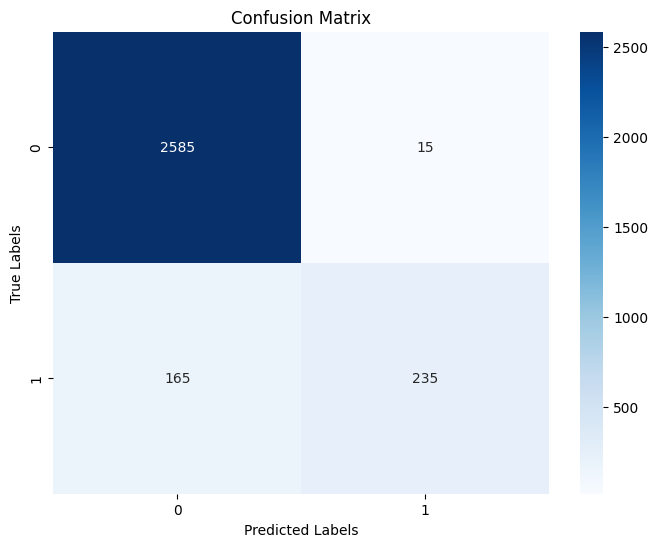

In [160]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, model_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

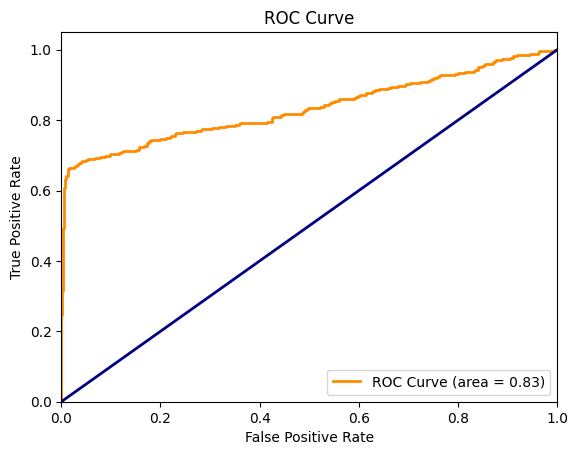

In [161]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [162]:
# Comparing Predicted and original dataframe Values
for orgin_val, pred_val in zip(y_test, model_prediction):
    print(f'Original Value: {orgin_val}, Predicted Value: {pred_val}')

Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Val

In [163]:
# Counting values correctly predicted by the Logistic Regression model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, model_prediction):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print('For a Logistic Regression Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a Logistic Regression Model:
Number of Total Predictions: 3000
Number of Correct Predictions: 2820
Number of Wrong Predictions: 180


### Decision Tree

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building a Decision Tree Model
dt_model = DecisionTreeClassifier()

# # Fitting and Making Predictions for the Decision Tree model
dt_model.fit(X_train, y_train)
dt_prediction = dt_model.predict(X_test)

In [165]:
# Evaluating Model Performance
dt_accuracy = accuracy_score(y_test, dt_prediction)
dt_report = classification_report(y_test, dt_prediction)

print(f'Accuracy: {dt_accuracy}')
print(f'Classification Report: {dt_report}')

y_pred_prob = dt_model.predict_proba(X_test)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_prediction))

Accuracy: 0.8826666666666667
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2600
           1       0.56      0.56      0.56       400

    accuracy                           0.88      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.88      0.88      0.88      3000

Confusion Matrix:
[[2423  177]
 [ 175  225]]


In [166]:
# Check for Overfitting with Cross-Validation
cv_scores = cross_val_score(dt_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.879  0.8665 0.8795 0.8785 0.89  ]
Mean cross-validation score: 0.8786999999999999


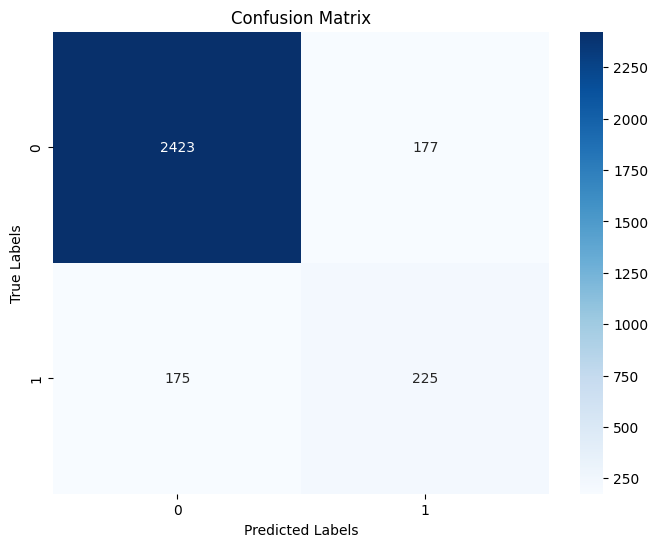

In [167]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, dt_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

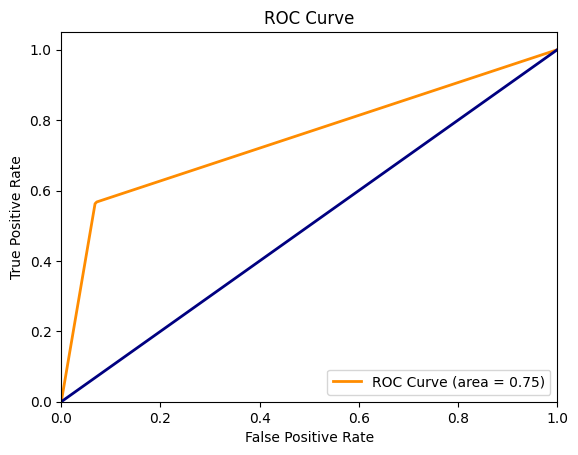

In [168]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [169]:
# Comparing Predicted and original dataframe Values
for orgin_val, pred_val in zip(y_test, dt_prediction):
    print(f'Original Value: {orgin_val}, Predicted Value: {pred_val}')

Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 1
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Val

In [170]:
# Counting values correctly predicted by the Desision Tree model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, dt_prediction):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print('For a Decision Tree Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a Decision Tree Model:
Number of Total Predictions: 3000
Number of Correct Predictions: 2648
Number of Wrong Predictions: 352


### Adaboost Model

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# AdaBoost Model

adaboost_model = AdaBoostClassifier(n_estimators = 50, random_state = 42)

# Fitting and Making Predictions for the adaboost model
adaboost_model.fit(X_train, y_train)
adaboost_predictions = adaboost_model.predict(X_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [172]:
# Evaluating Model Performance
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
adaboost_report = classification_report(y_test, adaboost_predictions)

print(f'Accuracy: {adaboost_accuracy}')
print(f'Classification Report: {adaboost_report}')

y_pred_prob = adaboost_model.predict_proba(X_test)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(y_test, adaboost_predictions))

Accuracy: 0.9306666666666666
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.99      0.96      2600
           1       0.94      0.51      0.66       400

    accuracy                           0.93      3000
   macro avg       0.94      0.75      0.81      3000
weighted avg       0.93      0.93      0.92      3000

Confusion Matrix:
[[2587   13]
 [ 195  205]]


In [173]:
# Check for Overfitting with Cross-Validation
cv_scores = cross_val_score(adaboost_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default)

Cross-validation scores: [0.9245 0.9305 0.9215 0.9245 0.9305]
Mean cross-validation score: 0.9263


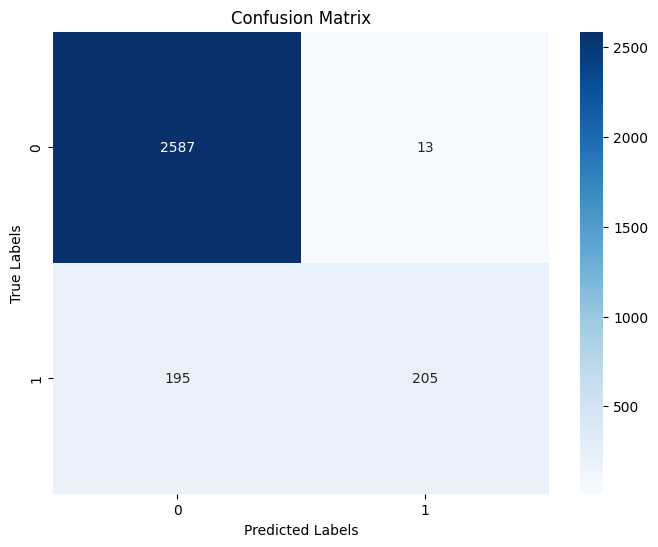

In [174]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, adaboost_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

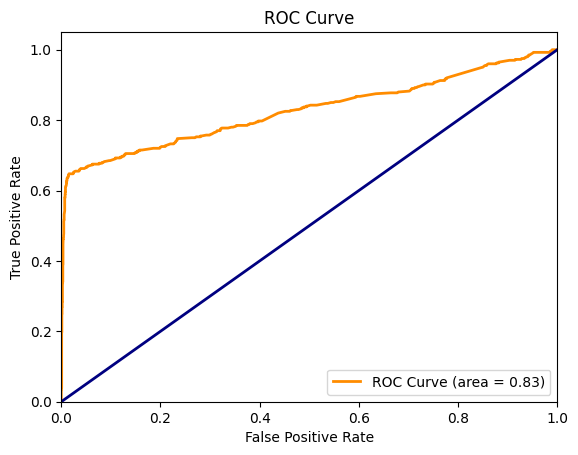

In [175]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [176]:
# Comparing Predicted and original dataframe Values
for orgin_val, pred_val in zip(y_test, adaboost_predictions):
    print(f'Original Value: {orgin_val}, Predicted Value: {pred_val}')

Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Val

In [177]:
# Counting values correctly predicted by the Adaboost model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, adaboost_predictions):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print('For a Adaboost Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a Adaboost Model:
Number of Total Predictions: 3000
Number of Correct Predictions: 2792
Number of Wrong Predictions: 208


### Random Forest Model

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Model

randm_forst = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting and Making Predictions for the Random Forest model
randm_forst.fit(X_train, y_train)
randm_prediction = randm_forst.predict(X_test)

In [179]:
# Evaluating Model Performance
randm_accuracy = accuracy_score(y_test, randm_prediction)
randm_report = classification_report(y_test, randm_prediction)

print(f'Accuracy: {randm_accuracy}')
print(f'Classification Report: {randm_report}')

y_pred_prob = randm_forst.predict_proba(X_test)[:, 1]
print("Confusion Matrix:")
print(confusion_matrix(y_test, randm_prediction))

Accuracy: 0.9293333333333333
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.99      0.96      2600
           1       0.91      0.52      0.66       400

    accuracy                           0.93      3000
   macro avg       0.92      0.76      0.81      3000
weighted avg       0.93      0.93      0.92      3000

Confusion Matrix:
[[2579   21]
 [ 191  209]]


In [180]:
# Check for Overfitting with Cross-Validation
cv_scores = cross_val_score(randm_forst, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.927  0.922  0.9235 0.921  0.932 ]
Mean cross-validation score: 0.9251000000000001


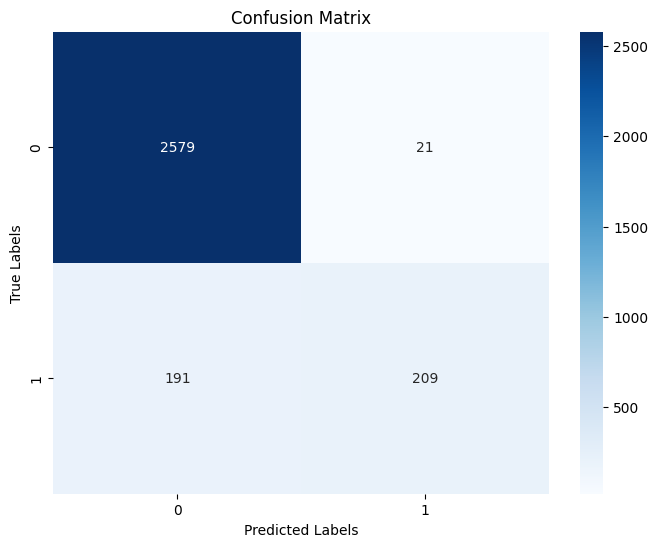

In [181]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, randm_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

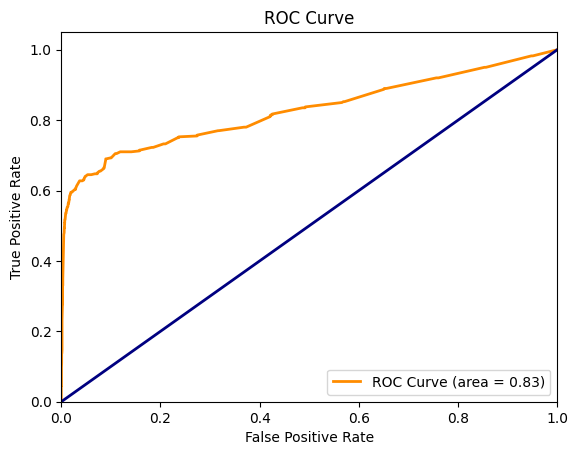

In [182]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [183]:
# Comparing Predicted and original dataframe Values
for orgin_val, pred_val in zip(y_test, randm_prediction):
    print(f'Original Value: {orgin_val}, Predicted Value: {pred_val}')

Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Value: 1, Predicted Value: 1
Original Value: 0, Predicted Value: 0
Original Val

In [184]:
# Counting values correctly predicted by the Random Forest model

correct_predictions = 0
wrong_predictions = 0
for orgin_val, pred_val in zip(y_test, randm_prediction):
    if orgin_val == pred_val:
        correct_predictions += 1
    else:
        wrong_predictions += 1

print('For a Random Forest Model:')
print(f'Number of Total Predictions: {correct_predictions + wrong_predictions}')
print(f'Number of Correct Predictions: {correct_predictions}')
print(f'Number of Wrong Predictions: {wrong_predictions}')

For a Random Forest Model:
Number of Total Predictions: 3000
Number of Correct Predictions: 2788
Number of Wrong Predictions: 212


## Model Evaluation
### Logistic Regression has an accuracy: 94%, Mean Cross Validation score: 94 and a ROC Cuvre: 0.83
### Best Model: Logistic Regression
#### Logistic Regression consistently performs well across metrics and shows strong stability with cross-validation among the four models
#### This displays that Logistic Regression is well balanced among all the 4 models and can be used to predict Fraudulant transactions better than the other 3 models

## Model Optimization of Logistic Regression

In [185]:
# Optimize Logistic Regression
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}


grid_log = GridSearchCV(LogisticRegression(random_state=42), param_grid_log, cv=5, scoring='roc_auc')
grid_log.fit(X_train, y_train)

best_log = grid_log.best_estimator_
y_pred_best_log = best_log.predict(X_test)
print("Best Parameters for Logistic Regression: ", grid_log.best_params_)

Best Parameters for Logistic Regression:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [186]:
# Evaluation function for Optimized Logistic Regression Model
def evaluate_model(model, X_test, y_test, y_pred):
    print(f"Model: {model}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:")
    print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

evaluate_model(best_log, X_test, y_test, y_pred_best_log)

Model: LogisticRegression(C=0.1, random_state=42, solver='liblinear')
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2600
           1       0.94      0.46      0.62       400

    accuracy                           0.92      3000
   macro avg       0.93      0.73      0.79      3000
weighted avg       0.93      0.92      0.91      3000

Confusion Matrix:
[[2588   12]
 [ 215  185]]
ROC AUC Score:
0.8338644230769232


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17296\67777193.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features['Importance'], y=top_features['Feature'], palette='viridis')


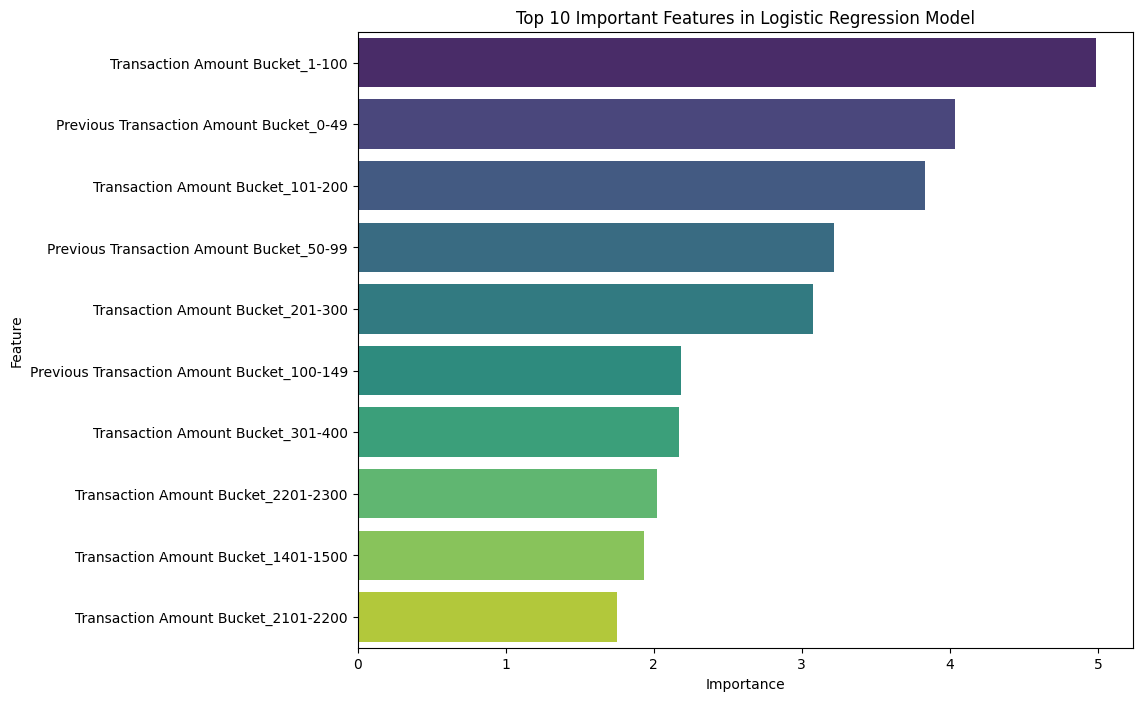

In [187]:
# Feature Importance
feature_importance = np.abs(logreg_model.coef_[0])
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Top 10 important features
top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_features['Importance'], y=top_features['Feature'], palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features in Logistic Regression Model')
plt.show()

## Business Report

### 1. Building and Evaluation of Model
#### I used the Category, Location, Device Type and Transaction amount, Previous Transaction Amount and Date and Time as inputs for the model for better readability and used the Fraud Value column comprising of (Yes:1,No:0) to predict Fradulant data 

### 2. Model Selection
#### Based on the performance metrics Logistic Regression performed the best among the 4 models

### 3. Business Decision
#### The business should incorporate the Logistic Regression model to predict fraudualant data due to its performance and varaiability of the data available
#### The model should also be maintained and optimized after deployment for better results on banking data